## Планирование рекламной кампании магазина "Стримчик".

## Описание проекта.
Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [44]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy.stats import levene
import seaborn as sns
import plotly.express as px
df = pd.read_csv('/datasets/games.csv')
print('-----------------------------------')
print('              ТАБЛИЦА')
print('-----------------------------------')
display(df)
print('-----------------------------------')
print('         ОБЩАЯ ИНФОРМАЦИЯ')
print('-----------------------------------')
df.info()
print('-----------------------------------')
print('       НАЗВАНИЯ СТОЛБЦОВ')
print('-----------------------------------')
cols = df.columns 
print(cols)

-----------------------------------
              ТАБЛИЦА
-----------------------------------


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


-----------------------------------
         ОБЩАЯ ИНФОРМАЦИЯ
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
-----------------------------------
       НАЗВАНИЯ СТОЛБЦОВ
-----------------------------------
Index(['Name', 'Platform', 'Year_of_Release', 

## Предобработка данных

In [45]:
df.columns = df.columns.str.lower()# Привёл названия столбцов к нижнему регистру
df['user_score'] = df['user_score'].replace('tbd', 'NaN') # Замена значения tbd на Nan 
df['year_of_release'] = df['year_of_release'].astype('Int64') # Перевёл года в формат Int64
df['user_score'] = df['user_score'].astype('float')# Перевёл оценки пользователей в формат Float64
df['genre'] = df['genre'].fillna(value='NoName') # заменил Nan на "NoName"
print('-----------------------------------')
print('ТАБЛИЦА ПОСЛЕ ИЗМЕНЕНИЙ')
print('-----------------------------------')
display(df)
print('-----------------------------------')
print('ПОДСЧЁТ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ')
print('-----------------------------------')
print(df.isna().sum()) # Подсчёт пропущенных значений
print('-----------------------------------')
print('ОБЩАЯ ИНФОРМАЦИЯ')
print('-----------------------------------')
df.info()

-----------------------------------
ТАБЛИЦА ПОСЛЕ ИЗМЕНЕНИЙ
-----------------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


-----------------------------------
ПОДСЧЁТ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
-----------------------------------
name                  2
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64
-----------------------------------
ОБЩАЯ ИНФОРМАЦИЯ
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий студента</b>
1: Столбец "name" нет возможности заполнить пропуски так как это название игр и по сути уникальное значение.
2: Столбец "year_of_release" с годами тоже не стоит заполнять, мы не можем быть уверенны что поставленный нами год будет верный что исказит результаты исследования.
3: Столбец "genre" с жанрами нет возможности заполнить так жанры можно считать уникальным значением и их всего 2 что не повлияет на наши результаты.   
4: Столбец "critic_score" нет возможности заполнить пропуски так как это оценка критиков и мы не можем знать наверняка какю оценку поставил тот или иной критик и замна пропусков может привести к искажению исследования.  
5: Столбец "user_score" нет возможности заполнить пропуски так как это оценка пользователей и опять же будет не корректно заполнять их какими либо занчениями так как может иссказить результаты.
6: Столбец "rating" нет возможности заполнить пропуски так как это рейтинг игры.
7: В остальных столбцах пропуски отсутствуют.

## Суммарные продажи во всех регионах.

In [46]:
df['sum_sales'] = df['eu_sales'] + df['other_sales'] + df['jp_sales'] + df['na_sales'] # Суммарные продажи во всех регионах
print('-----------------------------------')
print('СУММАРНЫЕ ПРОДАЖИ ВО ВСЕХ РЕГИОНАХ')
print('-----------------------------------')
display(df['sum_sales'])

-----------------------------------
СУММАРНЫЕ ПРОДАЖИ ВО ВСЕХ РЕГИОНАХ
-----------------------------------


0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: sum_sales, Length: 16715, dtype: float64

##  Cколько игр выпускалось в разные годы.

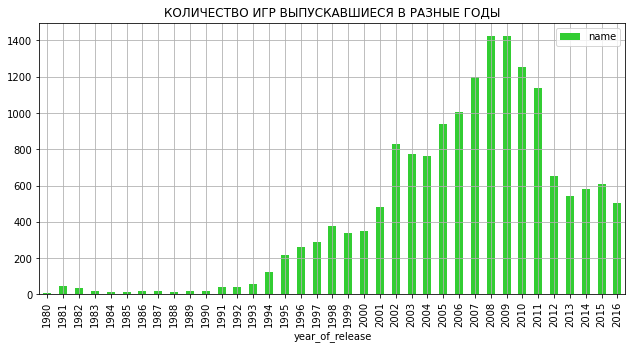

-------------------------------------------
КОЛИЧЕСТВО ИГР ВЫПУСКАВШИЕСЯ В РАЗНЫЕ ГОДЫ
-------------------------------------------


,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


In [47]:
(df.groupby(['year_of_release'])\
                  .agg({'name':'count'})
                  .plot(kind = 'bar',title = 'КОЛИЧЕСТВО ИГР ВЫПУСКАВШИЕСЯ В РАЗНЫЕ ГОДЫ',color = '#32CD32',figsize=(10.5,5),grid =True))
plt.show()
name_count = df.groupby(['year_of_release'])\
                  .agg({'name':'count'})
print('-------------------------------------------')
print('КОЛИЧЕСТВО ИГР ВЫПУСКАВШИЕСЯ В РАЗНЫЕ ГОДЫ')
print('-------------------------------------------')
display(name_count.head(5))

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий студента</b>
Пиковым значение для выпуска игр можно считать годы начиная с 2002, данные до 1994 года можно считать не существенными)

## Kак менялись продажи по платформам.

<AxesSubplot:title={'center':'ЛИДЕРЫ ПРОДАЖ'}, xlabel='platform'>

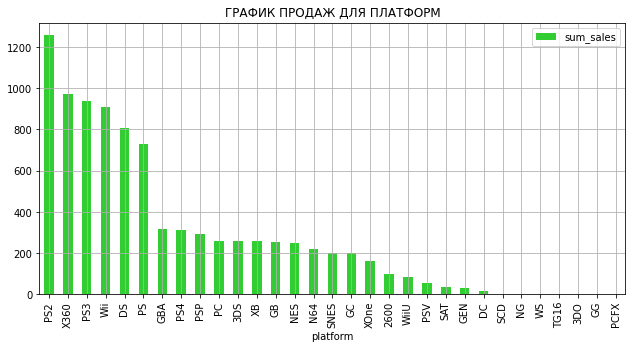

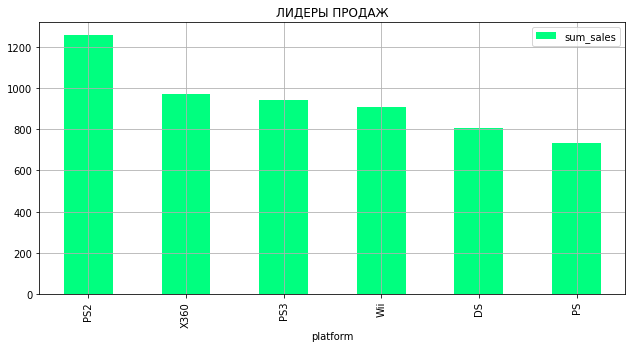

In [48]:
(df.groupby(['platform'])\
                  .agg({'sum_sales':'sum'}).sort_values(by = 'sum_sales',ascending=False)
                  .plot(kind = 'bar',title = 'ГРАФИК ПРОДАЖ ДЛЯ ПЛАТФОРМ',color = '#32CD32',figsize=(10.5,5),grid =True))
(df.groupby(['platform'])\
                  .agg({'sum_sales':'sum'}).sort_values(by = 'sum_sales',ascending=False).head(6)
                  .plot(kind = 'bar',title = 'ЛИДЕРЫ ПРОДАЖ',color = '#00FF7F',figsize=(10.5,5),grid =True))

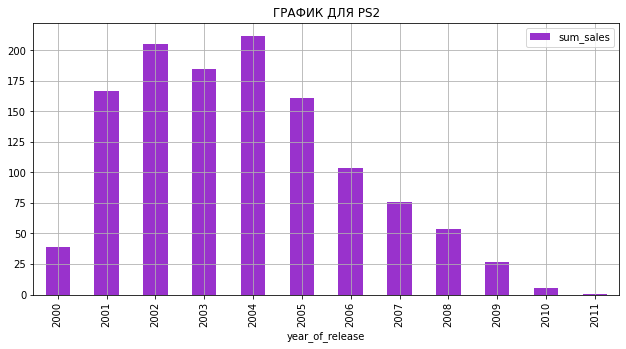

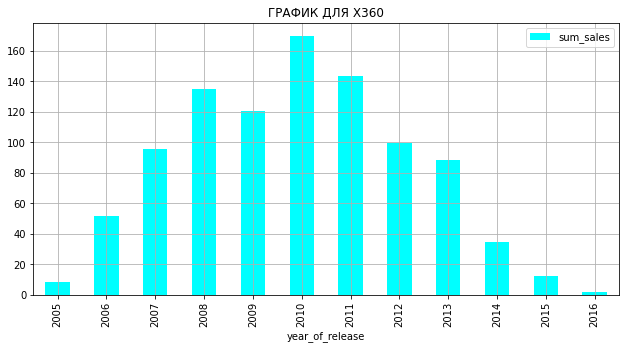

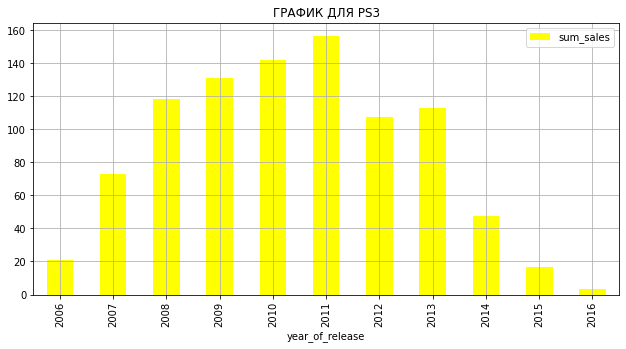

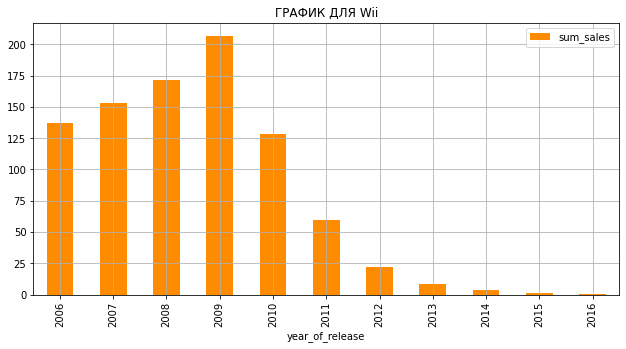

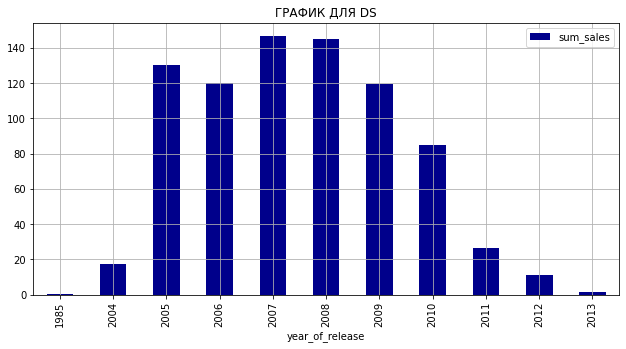

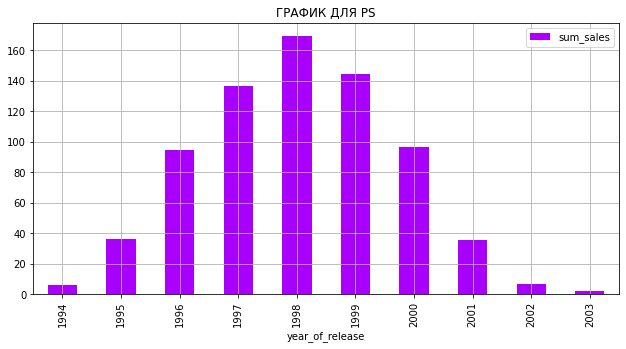

In [49]:
# PS2
(df.query('platform  == "PS2"')
             .pivot_table(index = 'year_of_release',
              values = 'sum_sales', aggfunc='sum')
             .plot(kind = 'bar',color = '#9932CC',grid =True,
             figsize=(10.5,5),title = 'ГРАФИК ДЛЯ PS2'))  
# X360
(df.query('platform  == "X360"')
             .pivot_table(index = 'year_of_release',
              values = 'sum_sales', aggfunc='sum')
             .plot(kind = 'bar',color = '#00FFFF',grid =True,
             figsize=(10.5,5),title = 'ГРАФИК ДЛЯ X360'))  

# PS3
(df.query('platform  == "PS3"')
             .pivot_table(index = 'year_of_release',
              values = 'sum_sales', aggfunc='sum')
             .plot(kind = 'bar',color = '#FFFF00',grid =True,
             figsize=(10.5,5),title = 'ГРАФИК ДЛЯ PS3')) 


# Wii
(df.query('platform  == "Wii"')
             .pivot_table(index = 'year_of_release',
              values = 'sum_sales', aggfunc='sum')
             .plot(kind = 'bar',color = '#FF8C00',grid =True,
             figsize=(10.5,5),title = 'ГРАФИК ДЛЯ Wii')) 

# DS
(df.query('platform  == "DS"')
             .pivot_table(index = 'year_of_release',
              values = 'sum_sales', aggfunc='sum')
             .plot(kind = 'bar',color = '#00008B',grid =True,
             figsize=(10.5,5),title = 'ГРАФИК ДЛЯ DS')) 

# PS
(df.query('platform  == "PS"')
             .pivot_table(index = 'year_of_release',
              values = 'sum_sales', aggfunc='sum')
             .plot(kind = 'bar',color = '#a900fe',grid =True,
             figsize=(10.5,5),title = 'ГРАФИК ДЛЯ PS')) 
plt.show()


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий студента</b>
В среднем срок службы одной платформы 10-11 лет, но есть данные по такой платформе как DS. выпущенна которая была аж в 1985 году,
но затем данных нет.
</div>   

##  Потенциально прибыльные платформы.



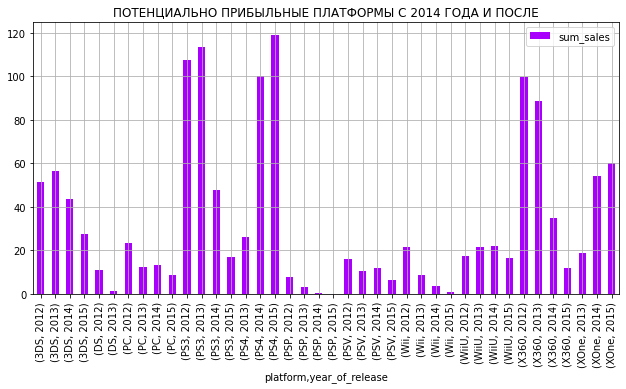

In [50]:
df_query = df.query('2012 <= year_of_release <= 2015')
df_query_platform_sale = (df_query.groupby(['platform','year_of_release'])\
                  .agg({'sum_sales':'sum'})
                  .plot(kind = 'bar',color = '#a900fe',grid =True,
                   figsize=(10.5,5),title = 'ПОТЕНЦИАЛЬНО ПРИБЫЛЬНЫЕ ПЛАТФОРМЫ С 2014 ГОДА И ПОСЛЕ')) 

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<b> Комментарий студента</b>
Все платформы за исключением X-One и PS4 показывают стойкий спад от года в год.
X-One и PS4 можно считать потенциально выгодными платформами.    
</div>   

## «Ящик с усами» по глобальным продажам потенциально прибыльных платформ.

Text(0, 0.5, 'Глобальные продажи')

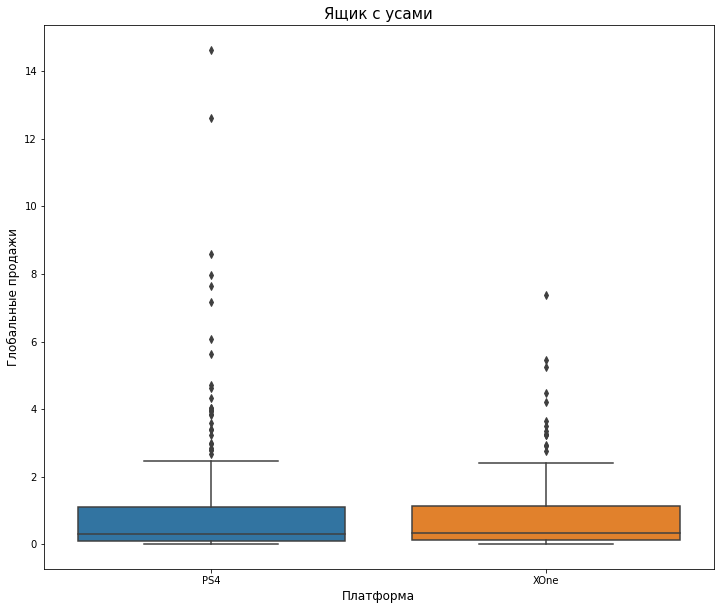

In [51]:

games_top_2_platforms = df_query[df_query['platform'].isin(['PS4','XOne'])]

plt.figure(figsize=(12,10))
sns.boxplot(data=games_top_2_platforms, x='platform', y='sum_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)


<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
 Мы видим что основные значения для PS4 лежат в пределах 0.3, но так же велик разброс   вплоть до 14.6.
 Мы видим что основные занчения для X-One лежат в пределах 0.35, но так же большой разброс вплоть до 7.3
</div>   

## Kак влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

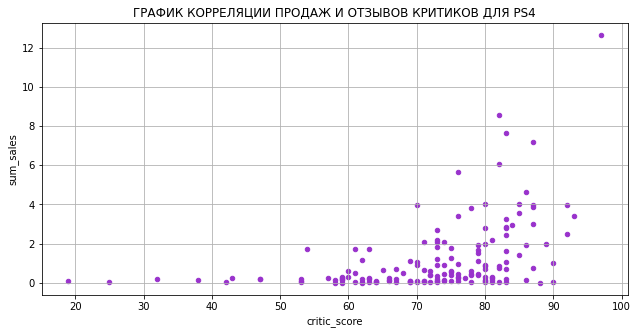

                      ----------------------------------------------
                  КОЭФФИЦИЕНТ ПИРСОНА КРИТИКИ - PS4: 0.4318482049982005
                      ----------------------------------------------


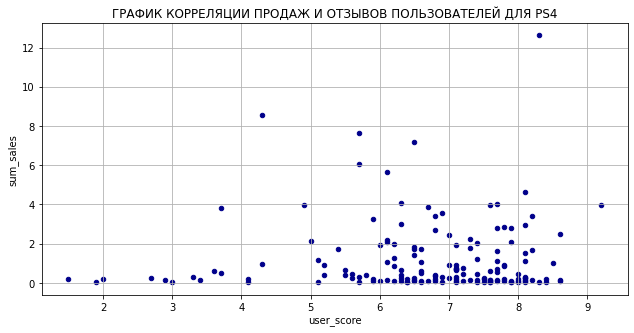

                      ----------------------------------------------
                  КОЭФФИЦИЕНТ ПИРСОНА ПОЛЬЗОВАТЕЛИ - PS4: 0.024230832360622557
                      ----------------------------------------------


In [52]:
data_ps4 = df_query.query('platform  == "PS4"')

(data_ps4.plot(x='critic_score', y='sum_sales', kind='scatter', figsize=(10.5,5),
              color = '#9932CC',title = 'ГРАФИК КОРРЕЛЯЦИИ ПРОДАЖ И ОТЗЫВОВ КРИТИКОВ ДЛЯ PS4', grid =True))
plt.show()
print('                      ----------------------------------------------')
print('                  КОЭФФИЦИЕНТ ПИРСОНА КРИТИКИ - PS4:',data_ps4['critic_score'].corr(data_ps4['sum_sales'])) # Кореляция
print('                      ----------------------------------------------')


(data_ps4.plot(x='user_score', y='sum_sales', kind='scatter', figsize=(10.5,5),
              color = '#00008B',title = 'ГРАФИК КОРРЕЛЯЦИИ ПРОДАЖ И ОТЗЫВОВ ПОЛЬЗОВАТЕЛЕЙ ДЛЯ PS4', grid =True))
plt.show()
print('                      ----------------------------------------------')
print('                  КОЭФФИЦИЕНТ ПИРСОНА ПОЛЬЗОВАТЕЛИ - PS4:',data_ps4['user_score'].corr(data_ps4['sum_sales'])) # Кореляция
print('                      ----------------------------------------------')

<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
Мы видим что корреляция присутствует, чем выше оценка пользователей и критиков тем больше продаж, для критиков это можно считать в отметку примерно 60 по 100 больной шкале , а для пользователей эта отметка примерно 5.5 по 10 балльной шкале.
</div>   

## Соотнесите выводы с продажами игр на других платформах.

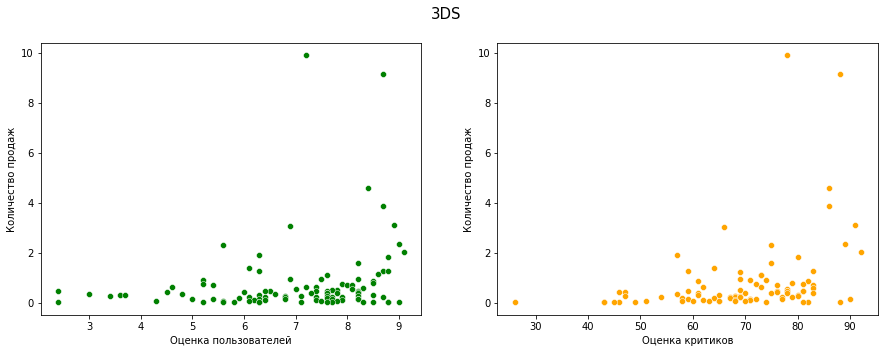

Корреляция между отзывами критиков и продажами  3DS 0.33314779963468866
Корреляция между отзывами пользователей и продажами  3DS 0.2105668122246367


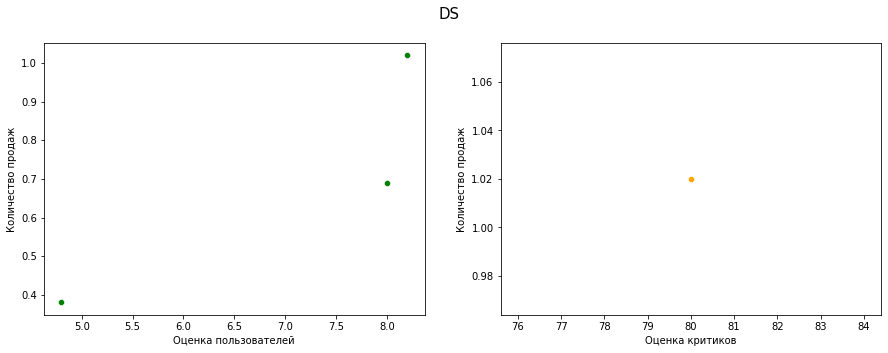

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Корреляция между отзывами критиков и продажами  DS nan
Корреляция между отзывами пользователей и продажами  DS 0.88270872757644


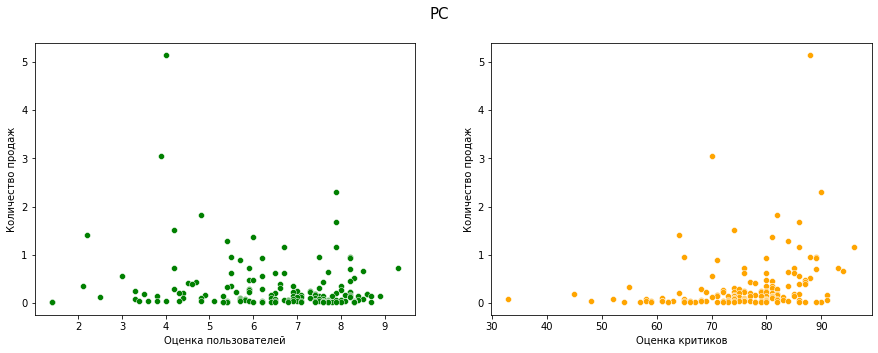

Корреляция между отзывами критиков и продажами  PC 0.26315662774565857
Корреляция между отзывами пользователей и продажами  PC -0.15922791823300492


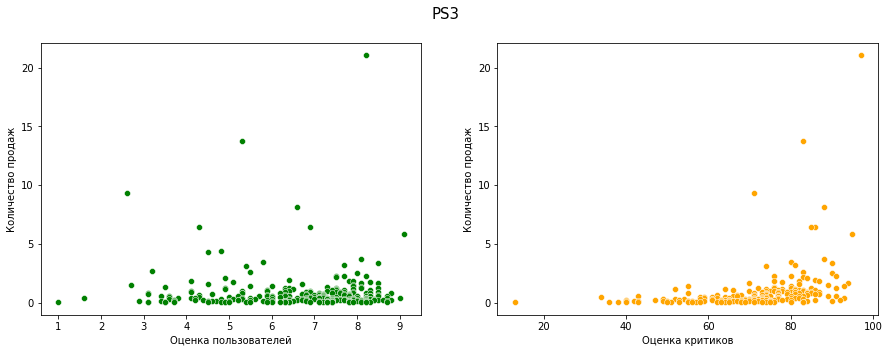

Корреляция между отзывами критиков и продажами  PS3 0.3314972592629587
Корреляция между отзывами пользователей и продажами  PS3 -0.0217136781004433


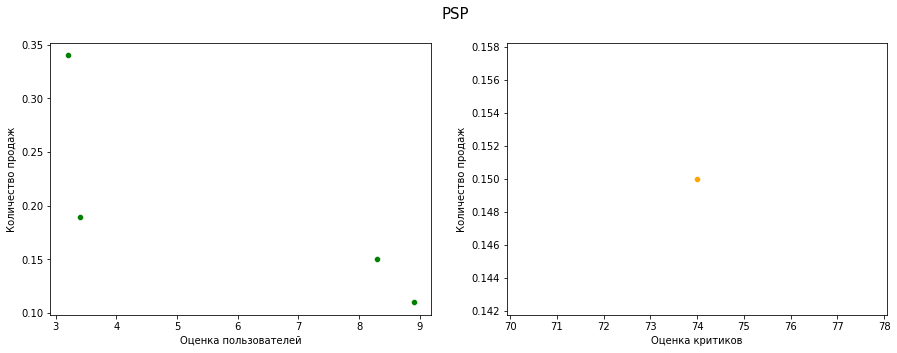

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Корреляция между отзывами критиков и продажами  PSP nan
Корреляция между отзывами пользователей и продажами  PSP -0.8023020619393209


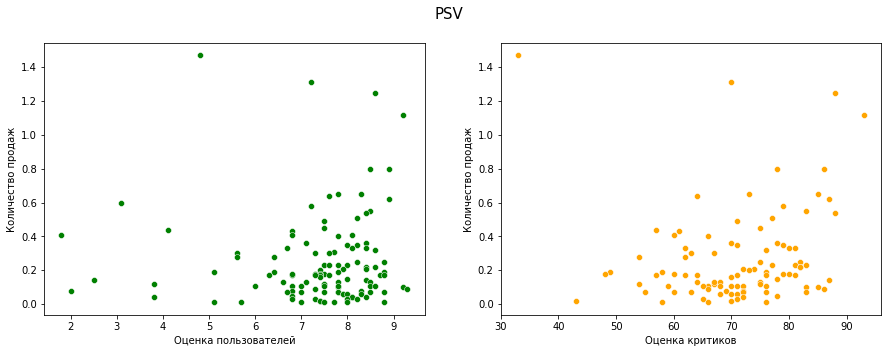

Корреляция между отзывами критиков и продажами  PSV 0.11612141423161348
Корреляция между отзывами пользователей и продажами  PSV 0.013595367007283742


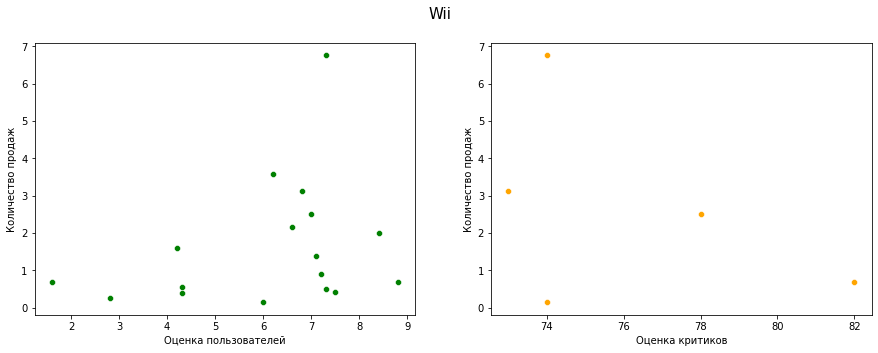

Корреляция между отзывами критиков и продажами  WII -0.4243413011077494
Корреляция между отзывами пользователей и продажами  WII 0.29619680007479526


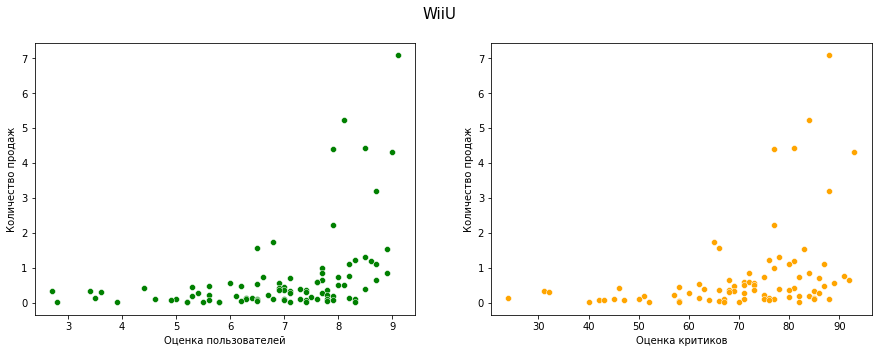

Корреляция между отзывами критиков и продажами  WIIU 0.3546914930621983
Корреляция между отзывами пользователей и продажами  WIIU 0.41326541780286735


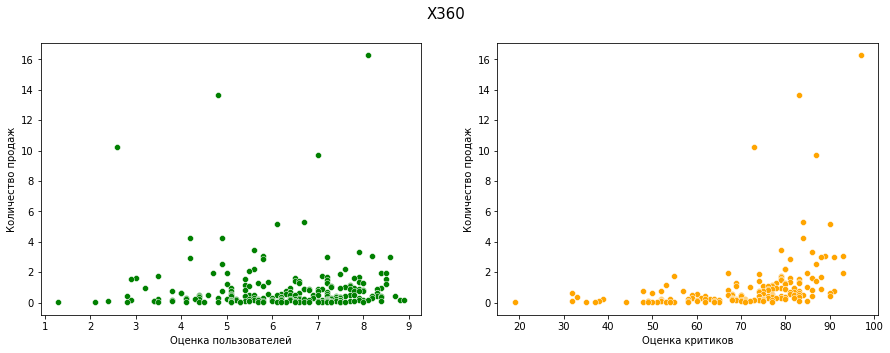

Корреляция между отзывами критиков и продажами  X360 0.36057348885073354
Корреляция между отзывами пользователей и продажами  X360 -0.009605025034522966


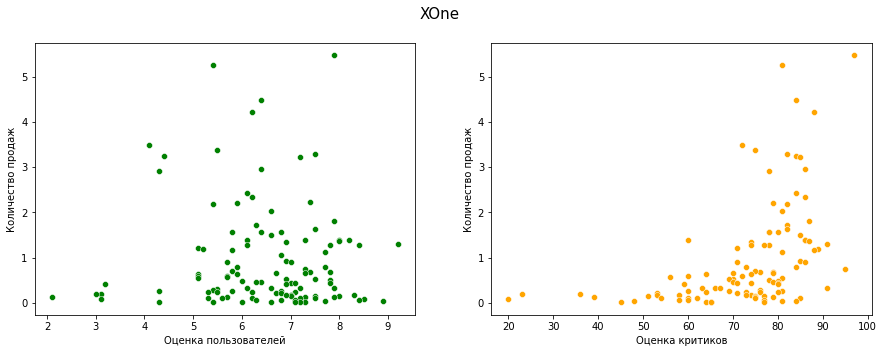

Корреляция между отзывами критиков и продажами  XONE 0.4593845680707105
Корреляция между отзывами пользователей и продажами  XONE -0.03926828544552198


In [53]:
games_luser_10_platforms = ['3DS','DS','PC','PS3','PSP','PSV','Wii','WiiU','X360','XOne']
def other_platform_matrix(name_of_platform):
    platform = df_query[df_query['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(color = 'green',x='user_score', y='sum_sales', data=platform, ax=ax[0])
    sns.scatterplot(color = 'orange',x='critic_score', y='sum_sales', data=platform, ax=ax[1])
                         
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()    
    correl = platform['user_score'].corr(platform['sum_sales'])
    critic_correl = platform['critic_score'].corr(platform['sum_sales'])   
    print('Корреляция между отзывами критиков и продажами ', name_of_platform.upper(),  critic_correl)
    print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(),  correl)

for platform in games_luser_10_platforms:
    other_platform_matrix(platform)
    
    

<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
Соотнося выводы топой платформы и остальных можно с точностью сказать что тенденция примерно одинаковая для всех платформ.
Что сказать про PSP и Wii, то судя по прошлым графикам года 2012 -2015 были закатом этих платформ и исходя из это можно предположить что данных по ним слишком мало так как в эти годы они уже не пользовались популярностью.
</div>   

## Распределение игр по жанрам.

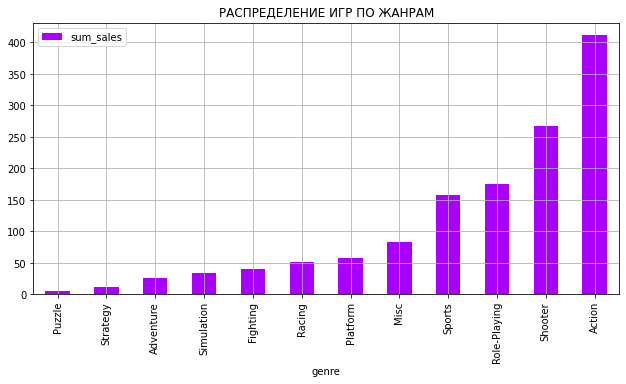

In [54]:
df_query_genre = (df_query.groupby(['genre'])\
                  .agg({'sum_sales':'sum'}).sort_values(by = 'sum_sales' )
                  .plot(kind = 'bar',color = '#a900fe',grid =True,
                   figsize=(10.5,5),title = 'РАСПРЕДЕЛЕНИЕ ИГР ПО ЖАНРАМ')) 


<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
Да, выделение по жзанрам действительно существует и можно скать что их 4 и они в несколько раз обходят остальные , это Role-Playing, Sports, Shooter и Action.
</div>   

## Самые популярные платформы.

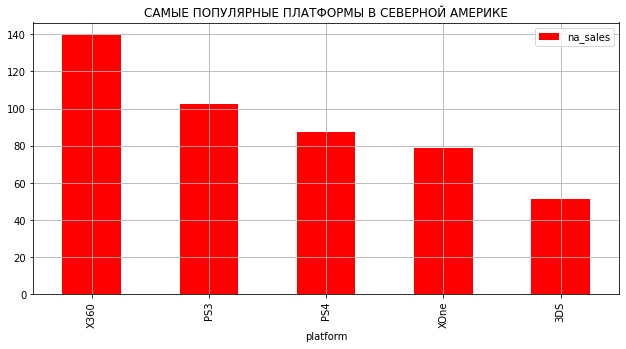

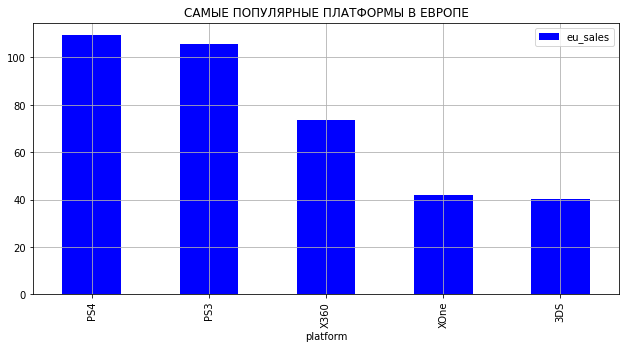

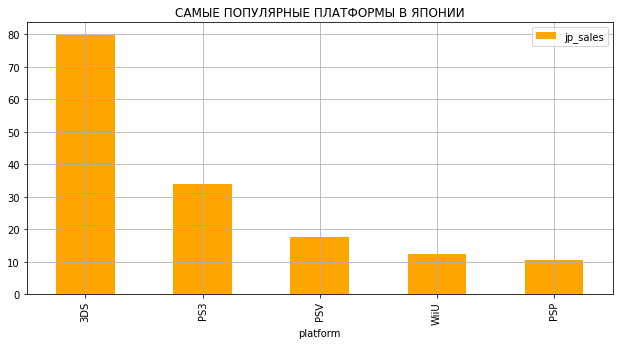

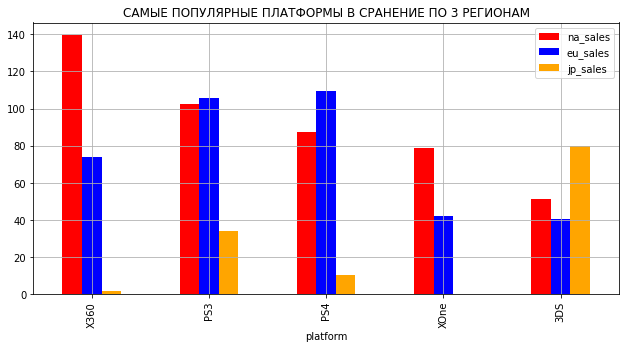

In [55]:
# САМЫЕ ПОПУЛЯРНЫЕ ПЛАТФОРМЫ В CЕВЕРНОЙ АМЕРИКЕ
plt.show()
(df_query.groupby(['platform'])\
                  .agg({'na_sales':'sum'}).sort_values(by = 'na_sales', ascending = False ).head(5)
                  .plot(kind = 'bar',color = 'red',grid =True,
                   figsize=(10.5,5),title = 'САМЫЕ ПОПУЛЯРНЫЕ ПЛАТФОРМЫ В CЕВЕРНОЙ АМЕРИКЕ')) 
# САМЫЕ ПОПУЛЯРНЫЕ ПЛАТФОРМЫ В ЕВРОПЕ
(df_query.groupby(['platform'])\
                  .agg({'eu_sales':'sum'}).sort_values(by = 'eu_sales', ascending = False ).head(5)
                  .plot(kind = 'bar',color = 'blue',grid =True,
                   figsize=(10.5,5),title = 'САМЫЕ ПОПУЛЯРНЫЕ ПЛАТФОРМЫ В ЕВРОПЕ')) 
# САМЫЕ ПОПУЛЯРНЫЕ ПЛАТФОРМЫ В ЯПОНИИ
(df_query.groupby(['platform'])\
                  .agg({'jp_sales':'sum'}).sort_values(by = 'jp_sales', ascending = False ).head(5)
                  .plot(kind = 'bar',color = 'orange',grid =True,
                   figsize=(10.5,5),title = 'САМЫЕ ПОПУЛЯРНЫЕ ПЛАТФОРМЫ В ЯПОНИИ')) 
# САМЫЕ ПОПУЛЯРНЫЕ ПЛАТФОРМЫ В СРАНЕНИЕ ПО 3 РЕГИОНАМ
(df_query.groupby(['platform'])\
                  .agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'}).sort_values(by = 'na_sales', ascending = False ).head(5)
                  .plot(kind = 'bar',color = ['red','blue','orange'],grid =True,
                   figsize=(10.5,5),title = 'САМЫЕ ПОПУЛЯРНЫЕ ПЛАТФОРМЫ В СРАНЕНИЕ ПО 3 РЕГИОНАМ')) 
plt.show()

<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
В европе и америке популярней всего PS4 и X-One, в Японии 3DS , хотя это странно ведь PS4 является Японской платформой , возможно тут играет роль что японский рынок по сравнению с американским и европейским намного меньше.
Что каксается PS3 и X 360 то тут можно скать что это устаревшие платформы и продажи по нимуже падают.
</div>   

## Самые популярные жанры.

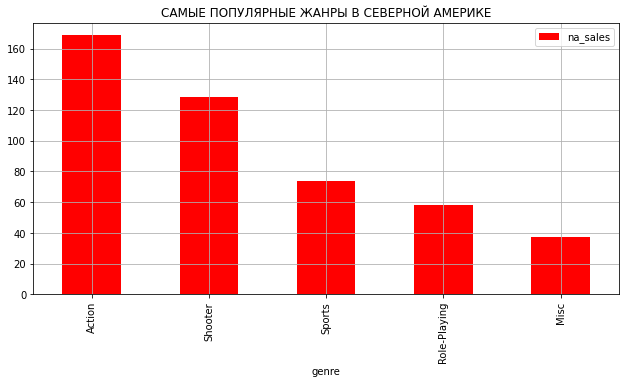

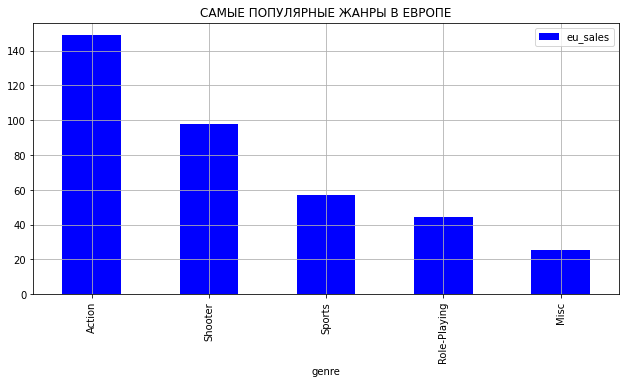

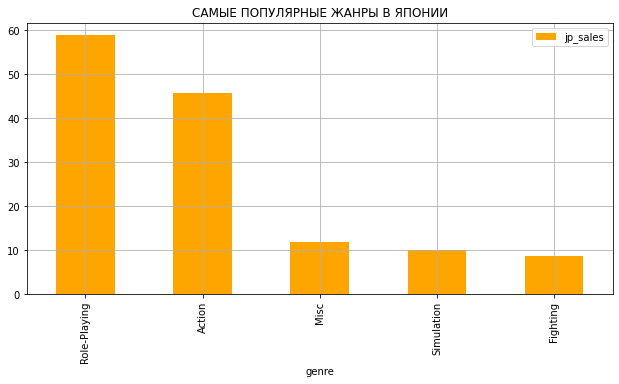

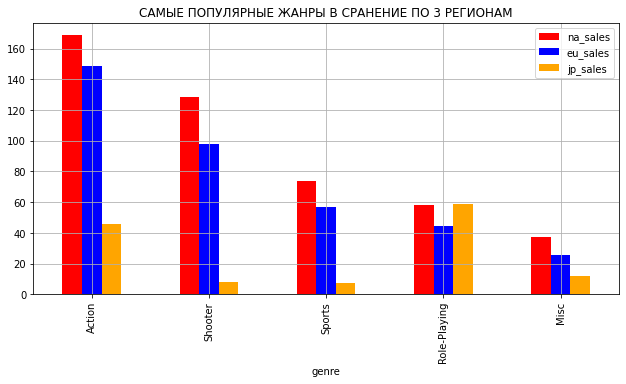

In [56]:
# САМЫЕ ПОПУЛЯРНЫЕ ЖАНРЫ В CЕВЕРНОЙ АМЕРИКЕ
(df_query.groupby(['genre'])\
                  .agg({'na_sales':'sum'}).sort_values(by = 'na_sales', ascending = False).head(5)
                  .plot(kind = 'bar',color = 'red',grid =True,
                   figsize=(10.5,5),title = 'САМЫЕ ПОПУЛЯРНЫЕ ЖАНРЫ В CЕВЕРНОЙ АМЕРИКЕ')) 
# САМЫЕ ПОПУЛЯРНЫЕ ЖАНРЫ В ЕВРОПЕ
(df_query.groupby(['genre'])\
                  .agg({'eu_sales':'sum'}).sort_values(by = 'eu_sales',ascending = False).head(5)
                  .plot(kind = 'bar',color = 'blue',grid =True,
                   figsize=(10.5,5),title = 'САМЫЕ ПОПУЛЯРНЫЕ ЖАНРЫ В ЕВРОПЕ')) 
#САМЫЕ ПОПУЛЯРНЫЕ ЖАНРЫ В ЯПОНИИ
(df_query.groupby(['genre'])\
                  .agg({'jp_sales':'sum'}).sort_values(by = 'jp_sales',ascending = False).head(5)
                  .plot(kind = 'bar',color = 'orange',grid =True,
                   figsize=(10.5,5),title = 'САМЫЕ ПОПУЛЯРНЫЕ ЖАНРЫ В ЯПОНИИ')) 
# САМЫЕ ПОПУЛЯРНЫЕ ЖАНРЫ В СРАНЕНИЕ ПО 3 РЕГИОНАМ
(df_query.groupby(['genre'])\
                  .agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'}).sort_values(by = 'na_sales',ascending = False).head(5)
                  .plot(kind = 'bar',color = ['red','blue','orange'],grid =True,
                   figsize=(10.5,5),title = 'САМЫЕ ПОПУЛЯРНЫЕ ЖАНРЫ В СРАНЕНИЕ ПО 3 РЕГИОНАМ')) 
plt.show()

<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
В Европе и Америке самые популярные жанры можно считать Shooter, Action и Sports, в Японии это Role-Playing и Action.
</div>   

## Влияет ли рейтинг ESRB на продажи.

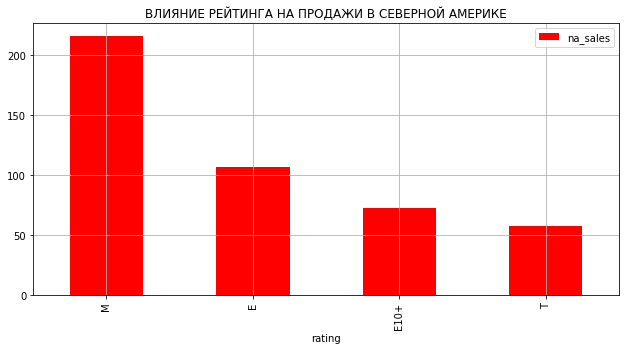

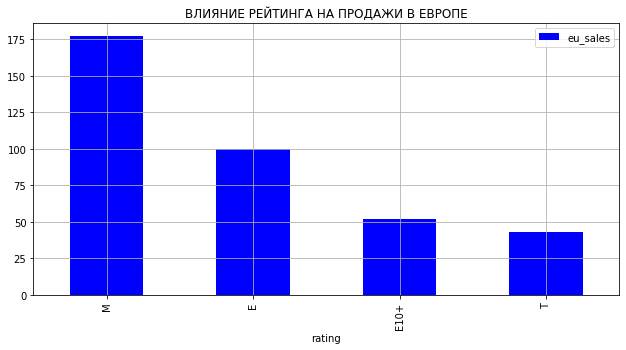

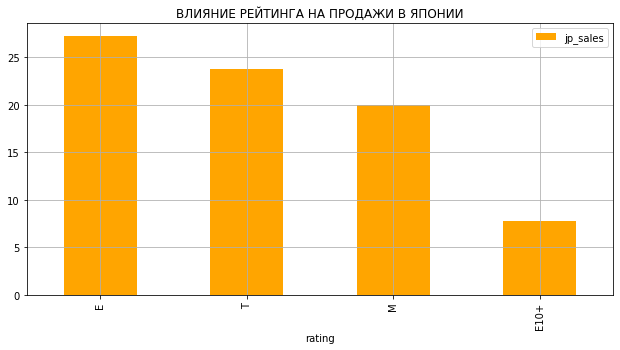

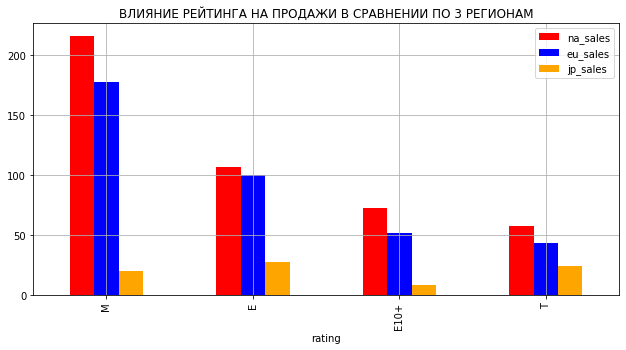

In [57]:
# РЕЙТИНГ ESRB  В CЕВЕРНОЙ АМЕРИКЕ
(df_query.groupby(['rating'])\
                  .agg({'na_sales':'sum'}).sort_values(by = 'na_sales',ascending = False)
                  .plot(kind = 'bar',color = 'red',grid =True,
                   figsize=(10.5,5),title = 'ВЛИЯНИЕ РЕЙТИНГА НА ПРОДАЖИ В CЕВЕРНОЙ АМЕРИКЕ')) 
# РЕЙТИНГ ESRB В ЕВРОПЕ
(df_query.groupby(['rating'])\
                  .agg({'eu_sales':'sum'}).sort_values(by = 'eu_sales',ascending = False)
                  .plot(kind = 'bar',color = 'blue',grid =True,
                   figsize=(10.5,5),title = 'ВЛИЯНИЕ РЕЙТИНГА НА ПРОДАЖИ В ЕВРОПЕ')) 
#РЕЙТИНГ ESRB В ЯПОНИИ
(df_query.groupby(['rating'])\
                  .agg({'jp_sales':'sum'}).sort_values(by = 'jp_sales',ascending = False)
                  .plot(kind = 'bar',color = 'orange',grid =True,
                   figsize=(10.5,5),title = 'ВЛИЯНИЕ РЕЙТИНГА НА ПРОДАЖИ В ЯПОНИИ')) 
#РЕЙТИНГ ESRB ПО 3 РЕГИОНАМ
(df_query.groupby(['rating'])\
                  .agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'}).sort_values(by = 'na_sales',ascending = False)
                  .plot(kind = 'bar',color = ['red','blue','orange'],grid =True,
                   figsize=(10.5,5),title = 'ВЛИЯНИЕ РЕЙТИНГА НА ПРОДАЖИ В СРАВНЕНИИ ПО 3 РЕГИОНАМ')) 
plt.show()

<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
ESRB:
E - everyone - для всех
M - (Mature 17+) — от 17 лет
T - (Teen) — для подростков 13-19 лет
E10+ - (Everyone 10+) — для всех старше 10 лет
В Америке и Европе популярней всего игры с рейтингов M - (Mature 17+) — от 17 лет и Е - everyone - для всех, в Японии же более популярны T - (Teen) — для подростков 13-19 лет и E - everyone - для всех.
</div>   

## Проверка гипотез.

<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
В теории сказанно: Иногда советуют предварительно проверить равенство дисперсий специальными тестами (например, тестом Левене). Мы не рекомендуем так делать: исследования показывают, что это только увеличивает вероятность сделать неверный вывод.
Так что «правило большого пальца» тут простое: если выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные — укажите equal_var = False при вызове метода scipy.stats.ttest_ind().
В остальных случаях используйте тест без изменений.
По подсчёту выборок вы видим что они не равны и исходя из этого имеем право использовать метод equal_var = False задающий, считать ли равными дисперсии выборок. 
</div> 

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [58]:
data_xone = df_query.query('platform  == "XOne"')
data_pc = df_query.query('platform  == "PC"')

data_xone_sum_sales = data_xone['user_score'] # РЕЙТИНГ Xbox One
data_pc_sum_sales = data_pc['user_score'] #РЕЙТИНГ PC
q = (len(data_xone_sum_sales)) # РАЗМЕР ВЫБОРКИ ДЛЯ Xbox One
print('-------------------------------------------')
print(f'ПОДСЧЁТ ВЫБОРКИ ДЛЯ Xbox One: {q:.2f}')
print('-------------------------------------------')
print('')
k = (len(data_pc_sum_sales)) # РАЗМЕР ВЫБОРКИ ДЛЯ PC
print('-------------------------------------------')
print(f'ПОДСЧЁТ ВЫБОРКИ ДЛЯ PC: {k:.2f}')
print('-------------------------------------------')

-------------------------------------------
ПОДСЧЁТ ВЫБОРКИ ДЛЯ Xbox One: 160.00
-------------------------------------------

-------------------------------------------
ПОДСЧЁТ ВЫБОРКИ ДЛЯ PC: 196.00
-------------------------------------------


<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC ровны.
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не ровны.
Нулевая гипотеза во всех случаях про равенство.
А вот альтернативная может быть про неравенство (двусторонняя) или про больше/меньше (односторонняя).
Так как у нас 2 выборки я решил произвевести проверку двух генеральных совокупностей по взятым из них выборкам.
В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind()], выберем параметр equal_var = False потому что размер двух выборок не одинаков.    
</div>     

In [59]:
alpha =.05

results = st.ttest_ind(
    data_xone_sum_sales, 
    data_pc_sum_sales, equal_var = False, nan_policy='omit')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.9441751855931831
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
Мы видим что не получается отвернуть нулевую гипотезу потому что статистически значимое число заданное нами оказалось меньше того что выдал нам т-тест.

   
</div>    

## Средние пользовательские рейтинги жанров Action  и Sports  разные.

In [60]:
action = df_query.query('genre  == "Action"')['user_score'] # CРЕЗ ДЛЯ ДОХОДА ПО ГОРОДУ МОСКВЕ
sports = df_query.query('genre  == "Sports"')['user_score']# СРЕЗ ДЛЯ ДОХОДА ПО ВСЕМ РЕГИОНАМ КРОМЕ МОСКВЫ
q = (len(action))
print('-------------------------------------------')
print(f'ПОДСЧЁТ ВЫБОРКИ Action: {q:.2f}')
print('-------------------------------------------')
print('')
k = (len(sports))
print('-------------------------------------------')
print(f'ПОДСЧЁТ ВЫБОРКИ Sports: {k:.2f}')
print('-------------------------------------------')

-------------------------------------------
ПОДСЧЁТ ВЫБОРКИ Action: 853.00
-------------------------------------------

-------------------------------------------
ПОДСЧЁТ ВЫБОРКИ Sports: 220.00
-------------------------------------------


<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports ровны.
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports отличаются.
Нулевая гипотеза во всех случаях про равенство.
А вот альтернативная может быть про неравенство (двусторонняя) или про больше/меньше (односторонняя).
Так как у нас 2 выборки я решил произвевести проверку двух генеральных совокупностей по взятым из них выборкам.
В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind()], выберем параметр equal_var = False потому что размер двух выборок не одинаков.    
</div>     

In [61]:
alpha = .05

results = st.ttest_ind(
    action, 
    sports,equal_var = False, nan_policy='omit') 

print('p-значение:',  results.pvalue)

if results.pvalue < alpha:

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.7671307856639837e-18
Отвергаем нулевую гипотезу


<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> Комментарий студента</b>
Отвергаем нулевую гипотезу потому что статистически значимое число заданное нами ,больше числа которое выдал нам - тест.

   
</div>    

<div class="alert alert-info"style="border-radius: 10px; box-shadow: 2px 2px 2px;border: 1px solid ">
<b> ОБЩИЙ ВЫВОД</b>
Рейтинги критиков и пользователей хороший показатель что бы прогнозировать рекламные кампании.
в будущем механизм обработки данных можно будет использовать , останется лишь поменять срезы по платформам если вдруг таковые изменятся и изменить срез по годам на интересующий нас.
</div>   